<a href="https://colab.research.google.com/github/deepshah1300/AI/blob/master/j077_exxp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_covtype
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype

forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target


In [ ]:
X=pd.DataFrame(x_fetch_covtype)
Y=y_fetch_covtype
Y1=pd.DataFrame(Y.copy())
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y1.columns=["Outcome"]

In [ ]:
Y1.head()

,Outcome
0,5
1,5
2,2
3,2
4,5


In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

Hence No Null Values in the Dataset

In [ ]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Outcome
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


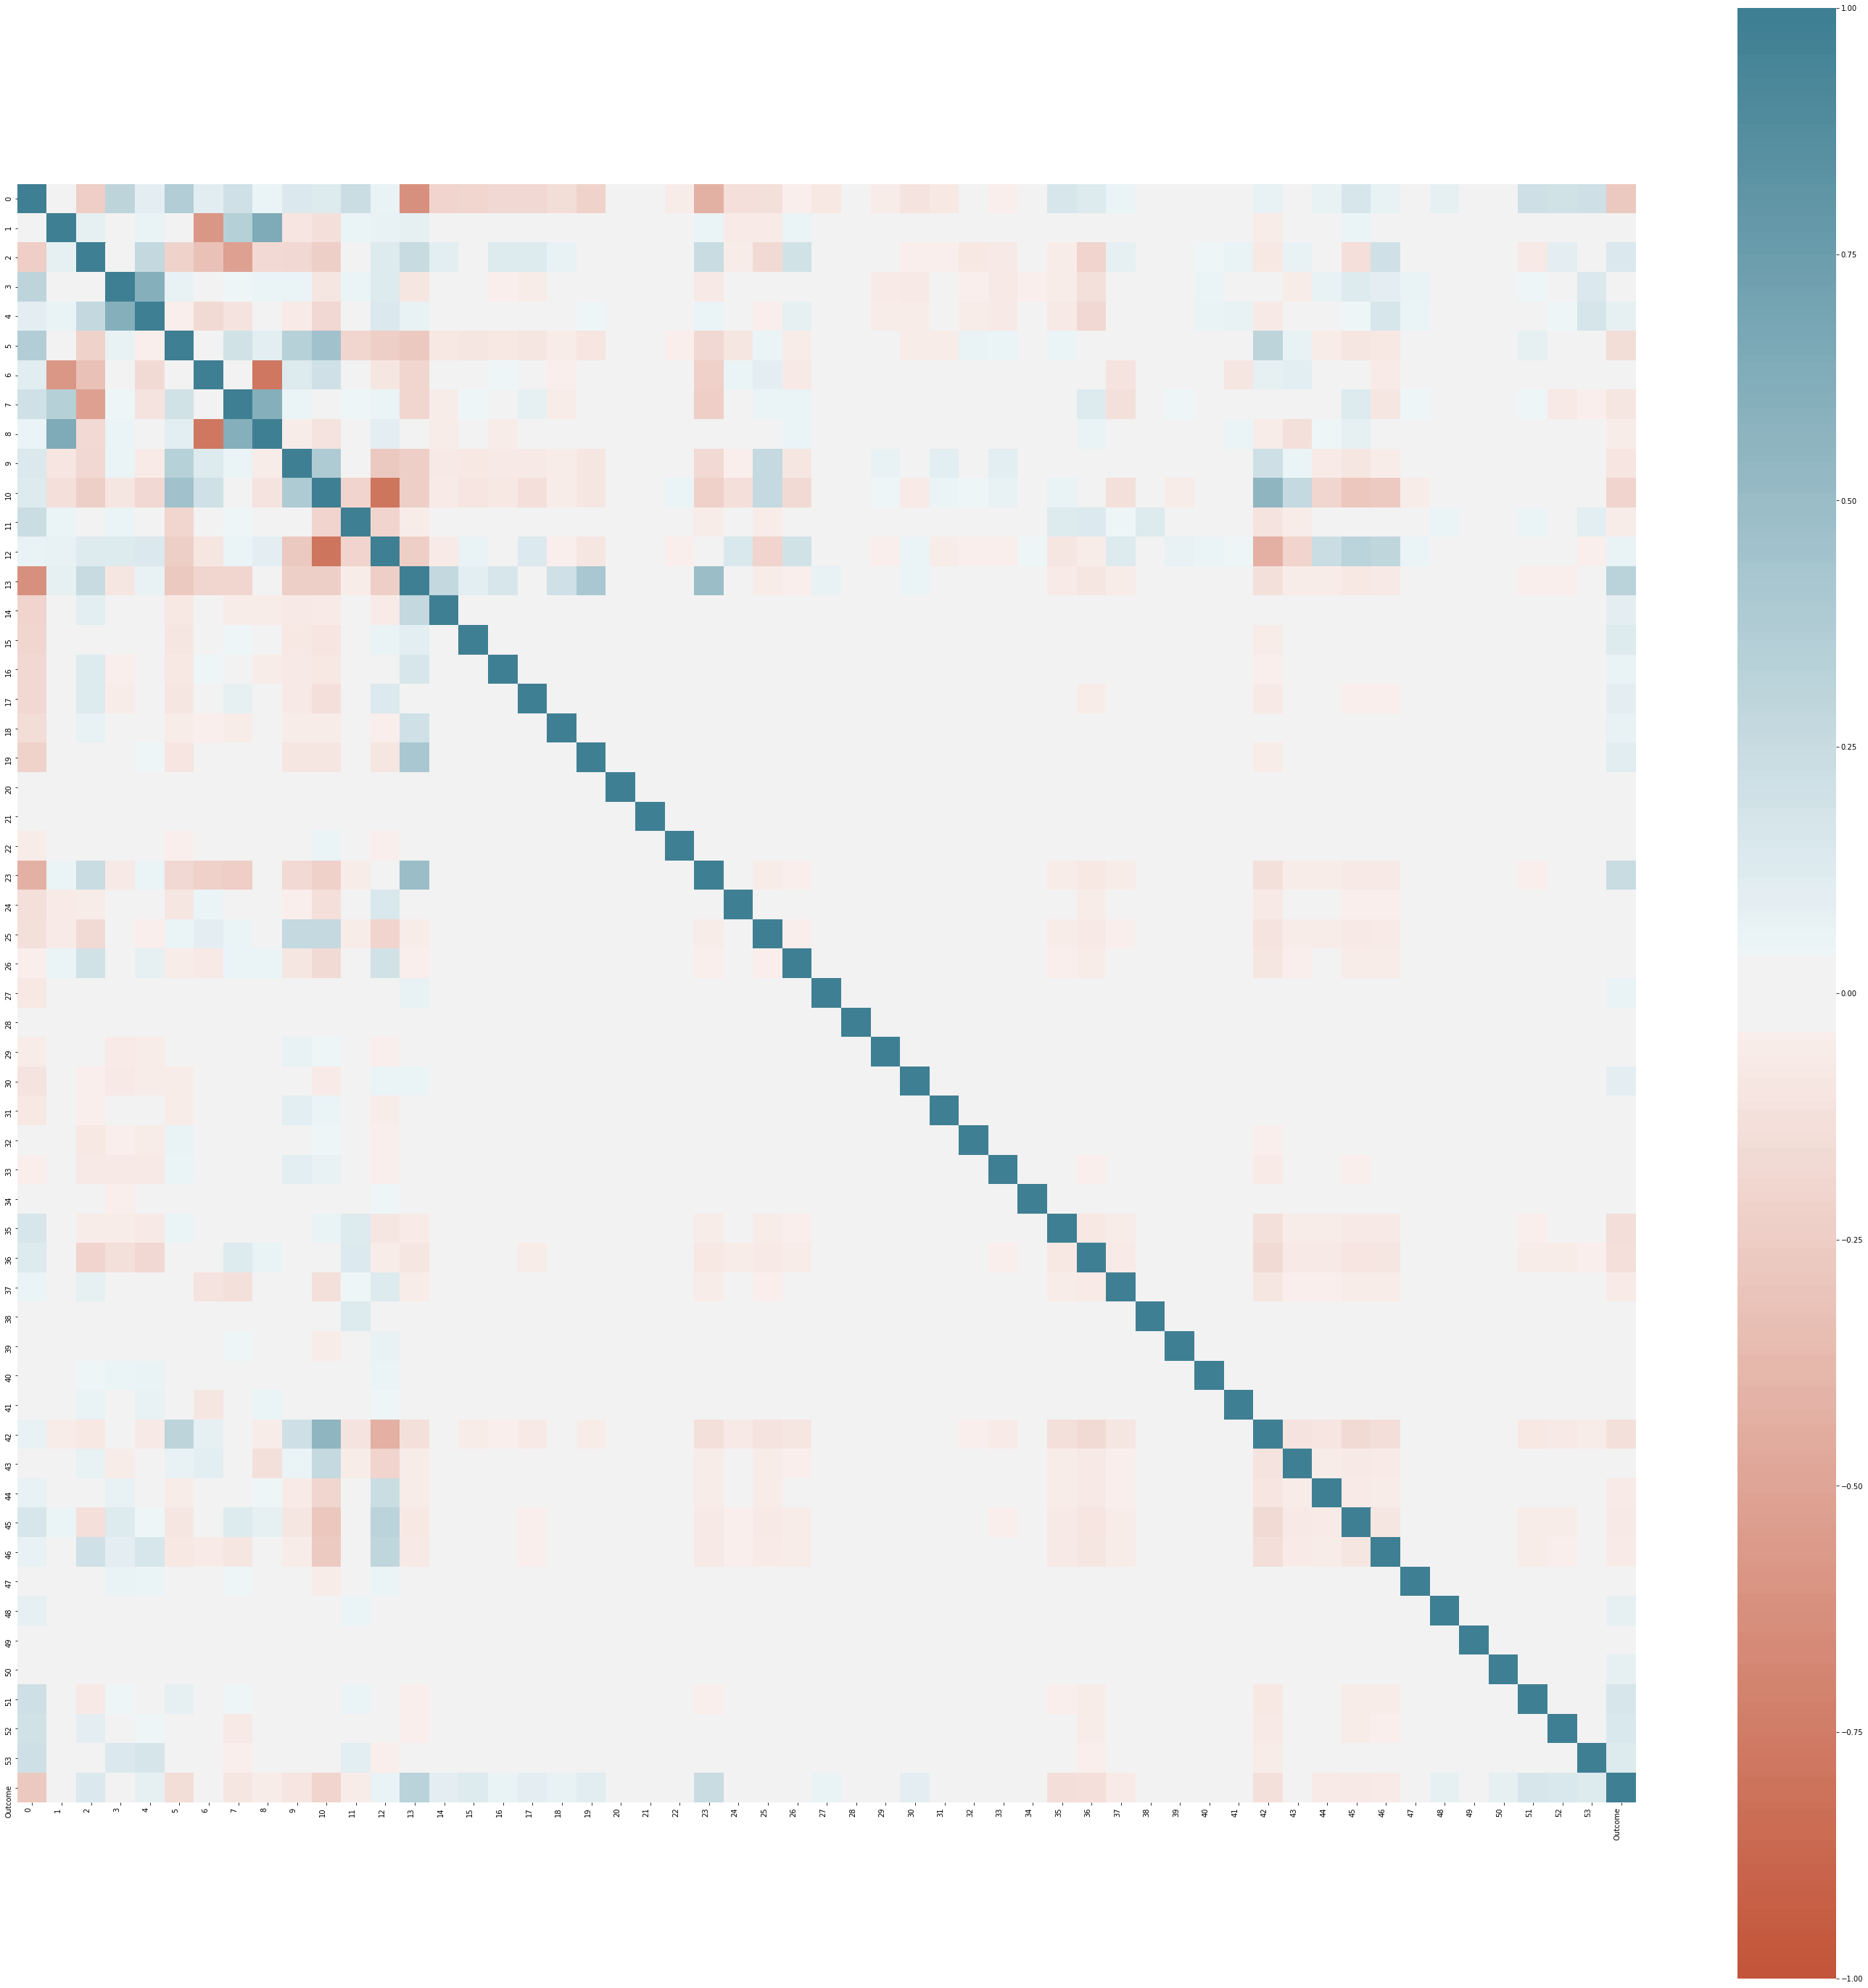

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [50,50])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

From the figure we can see the highly correlated function with Outcome are: 
0-19 , 23 , 36-39 , 42, 50-53. 

In [ ]:
FilterData=Fulldata.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,36,33,38,39,42,50,51,52,53]]
FilterData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,36,33,38,39,42,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
FilterData.shape

(581012, 30)

Now variable selection is done ; Now we will do Standardisation of X Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

Label Encoding Y Values 

In [ ]:
Y1.head()

,Outcome
0,5
1,5
2,2
3,2
4,5


In [ ]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
581007,0,0,1,0,0,0,0
581008,0,0,1,0,0,0,0
581009,0,0,1,0,0,0,0
581010,0,0,1,0,0,0,0


Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [ ]:
X_train

array([[ 0.14870359, -0.58667394, -0.01384886, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.11922377,  1.43274059,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [ 0.14870359, -0.98876976,  1.05449363, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-3.1407643 , -0.01480434,  2.92409298, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [ 0.83445585, -0.82793143, -0.94864854, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5406203 ,  0.53919434, -0.41447729, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from keras import models
from keras import layers

In [ ]:
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-covtype-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.75)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(50,activation="sigmoid",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(7,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1550      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 1,907
Trainable params: 1,907
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, y_train, epochs=20,batch_size=50, verbose=1, validation_split=0.25,callbacks=callbacks_list)

Epoch 1/20
6955/6973 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.7072
Epoch 00001: val_accuracy improved from -inf to 0.72891, saving model to weights-improvement-covtype-01-0.73.hdf5
6973/6973 [==============================] - 10s 1ms/step - loss: 0.6891 - accuracy: 0.7072 - val_loss: 0.6264 - val_accuracy: 0.7289
Epoch 2/20
6955/6973 [============================>.] - ETA: 0s - loss: 0.6116 - accuracy: 0.7366
Epoch 00002: val_accuracy improved from 0.72891 to 0.74366, saving model to weights-improvement-covtype-02-0.74.hdf5
6973/6973 [==============================] - 10s 1ms/step - loss: 0.6116 - accuracy: 0.7366 - val_loss: 0.5919 - val_accuracy: 0.7437
Epoch 3/20
6971/6973 [============================>.] - ETA: 0s - loss: 0.5827 - accuracy: 0.7498
Epoch 00003: val_accuracy improved from 0.74366 to 0.75730, saving model to weights-improvement-covtype-03-0.76.hdf5
6973/6973 [==============================] - 9s 1ms/step - loss: 0.5827 - accuracy: 0.7498

In [ ]:
models_new=models.Sequential()
models_new.add(layers.Dense(50,activation="sigmoid",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(7,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-covtype-20-0.81.hdf5")
#This depends on storage and jo saved hua hai...so sometimes u need to rename it and chose max accuracy wala only
models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 

#Can use the below model also
#from keras.models import load_model
#saved_model = load_model('weights-improvement-covtype-10-0.81.hdf5')
#test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.8f' % ( test_acc))
#print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.80504805
Test Loss: 0.463


**Accuracy coming around ~ 80% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

Plot of accuracy of Train & Validation

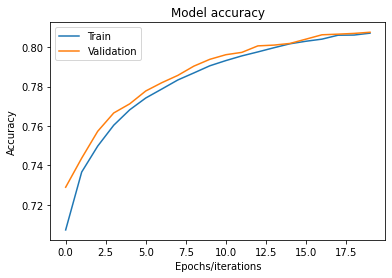

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation

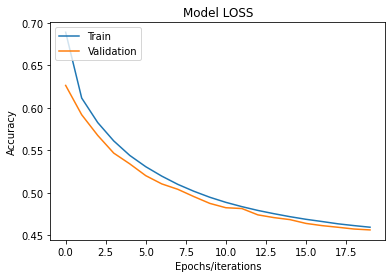

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**


1)Made 1st Layer of Sigmoid Activation and the input dimension = 30 as 30 variables in dataset.

2)Added 2nd Layer of Softmax that is also the output layer and 7 classes so choose 7 as next layer shape.

3)Have added  a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 7 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=20 & Batch_size=50 & Steps_per_epoch=6973

#**Dataset:kddcup99**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_kddcup99
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html#sklearn.datasets.fetch_kddcup99

kddcup99 = fetch_kddcup99()
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target
X = pd.DataFrame(x_fetch_kddcup99)
Y = pd.DataFrame(y_fetch_kddcup99)
print(X.shape)
print(Y.shape)

(494021, 41)
(494021, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in [1,2,3]:
  X[i] = [j.decode('utf-8') for j in X[i]]
  X[i] = le.fit_transform(X[i])

for i in range(X.shape[1]):
  X[i] = X[i].astype('float')

In [ ]:
Y = [i.decode('utf-8') for i in y_fetch_kddcup99]
Y = pd.DataFrame(le.fit_transform(Y))

In [ ]:
Y.columns=["Outcome"]

In [ ]:
Y.head()

,Outcome
0,11
1,11
2,11
3,11
4,11


In [ ]:
Y['Outcome'].nunique()

23

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

Hence No Null Values in the Dataset

In [ ]:
Y1=pd.DataFrame(Y.copy())

In [ ]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,Outcome
0,0.0,1.0,22.0,9.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11
1,0.0,1.0,22.0,9.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11
2,0.0,1.0,22.0,9.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
3,0.0,1.0,22.0,9.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
4,0.0,1.0,22.0,9.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11


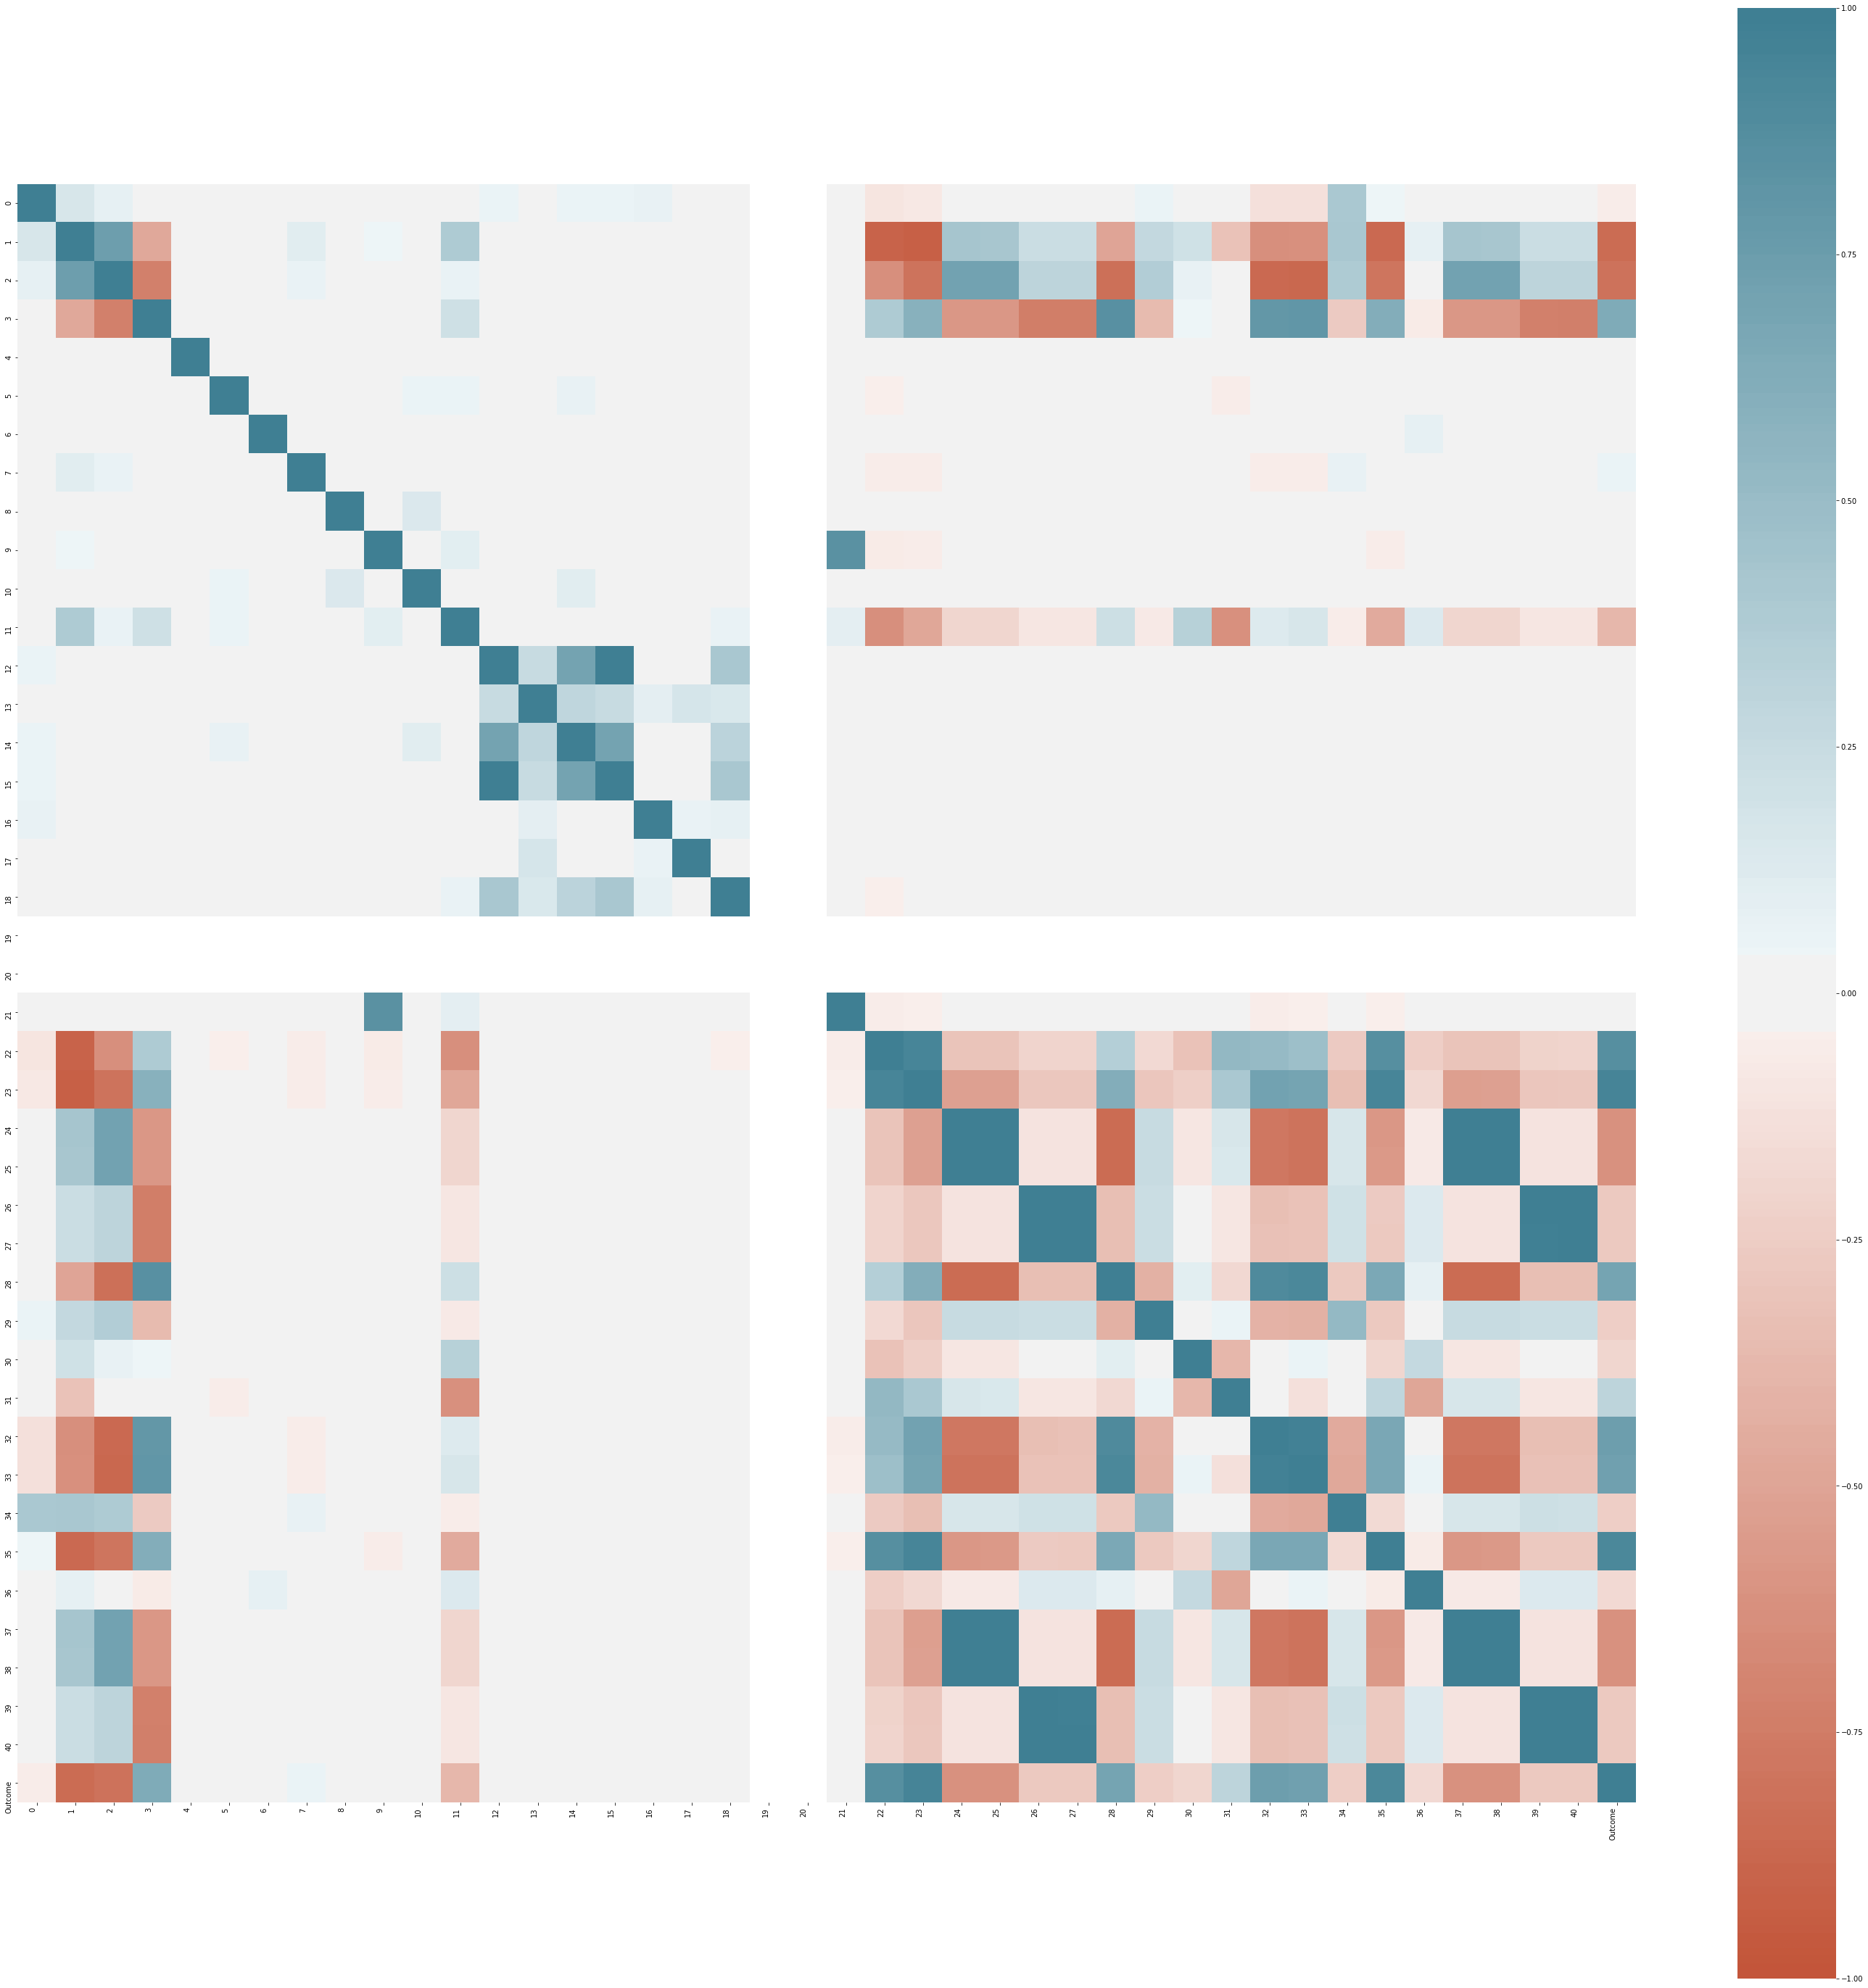

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [50,50])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

From the figure we can see the highly correlated function with Outcome are: 
0-3 ,11, 22-40. 

In [ ]:
FilterData=Fulldata.iloc[:,[0,1,2,3,11,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
FilterData.head()

,0,1,2,3,11,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,22.0,9.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,22.0,9.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [ ]:
FilterData.shape

(494021, 24)

Now variable selection is done ; Now we will do Standardisation of X Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

Label Enncoding Y Values 

In [ ]:
Y1.head()

,Outcome
0,11
1,11
2,11
3,11
4,11


In [ ]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494017,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494018,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494019,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [ ]:
X_train

array([[-0.06779172, -0.81154961, -0.69498244, ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306,  1.5948145 , ...,  2.16202721,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       ...,
       [-0.06779172,  2.66305573,  1.22549241, ..., -0.46320239,
         1.65611515, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306,  1.5948145 , ...,  2.16202721,
        -0.25203952, -0.249464  ]])

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_stand.shape

(494021, 24)

In [ ]:
Y1['Outcome'].nunique()

23

In [ ]:
initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-kdcup99-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.5)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(60,activation="sigmoid",input_shape=(24,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(23,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_5 (Dense)              (None, 23)                1403      
Total params: 2,903
Trainable params: 2,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, y_train, epochs=20,batch_size=50, verbose=1, validation_split=0.25,callbacks=callbacks_list)

Epoch 1/20
5914/5929 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.9837
Epoch 00001: val_accuracy improved from -inf to 0.99236, saving model to weights-improvement-kdcup99-01-0.99.hdf5
5929/5929 [==============================] - 8s 1ms/step - loss: 0.0777 - accuracy: 0.9838 - val_loss: 0.0266 - val_accuracy: 0.9924
Epoch 2/20
5889/5929 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9934
Epoch 00002: val_accuracy improved from 0.99236 to 0.99441, saving model to weights-improvement-kdcup99-02-0.99.hdf5
5929/5929 [==============================] - 8s 1ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0163 - val_accuracy: 0.9944
Epoch 3/20
5891/5929 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9957
Epoch 00003: val_accuracy improved from 0.99441 to 0.99669, saving model to weights-improvement-kdcup99-03-1.00.hdf5
5929/5929 [==============================] - 8s 1ms/step - loss: 0.0133 - accuracy: 0.9957 -

In [ ]:
models_new=models.Sequential()
models_new.add(layers.Dense(60,activation="sigmoid",input_shape=(24,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(23,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-kdcup99-10-1.00.hdf5")
#This depends on storage and jo saved hua hai...so sometimes u need to rename it and chose max accuracy wala only
models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 

#Can use the below model also
#from keras.models import load_model
#saved_model = load_model('weights-improvement-covtype-10-0.81.hdf5')
#test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.8f' % ( test_acc))
#print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.99817824
Test Loss: 0.007


**Accuracy coming around ~ 99% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

Plot of accuracy of Train & Validation

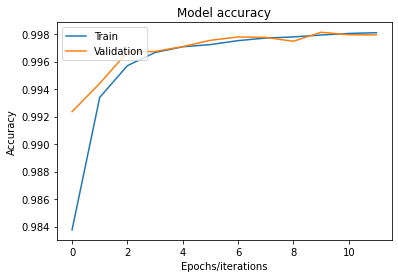

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation

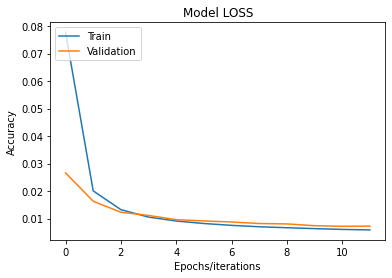

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**

1)Made 1st Layer of Sigmoid Activation and the input dimension = 24 as 24 variables in dataset.

2)Added 2nd Layer of Softmax that is also the output layer and 23 classes so choose 23 as next layer shape.

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 23 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=20 & Batch_size=50 & Steps_per_epoch=5929

#**datasets.load_breast_cancer()**

In [ ]:
from sklearn.datasets import load_breast_cancer
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = load_breast_cancer()
x_bc = cancer.data
y_bc = cancer.target

In [ ]:
X=pd.DataFrame(x_bc)
Y=y_bc
Y1=pd.DataFrame(Y.copy())
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y1.columns=["Outcome"]

In [ ]:
Y1.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [ ]:
Y1['Outcome'].nunique()

2

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

Hence No Null Values in the Dataset

In [ ]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


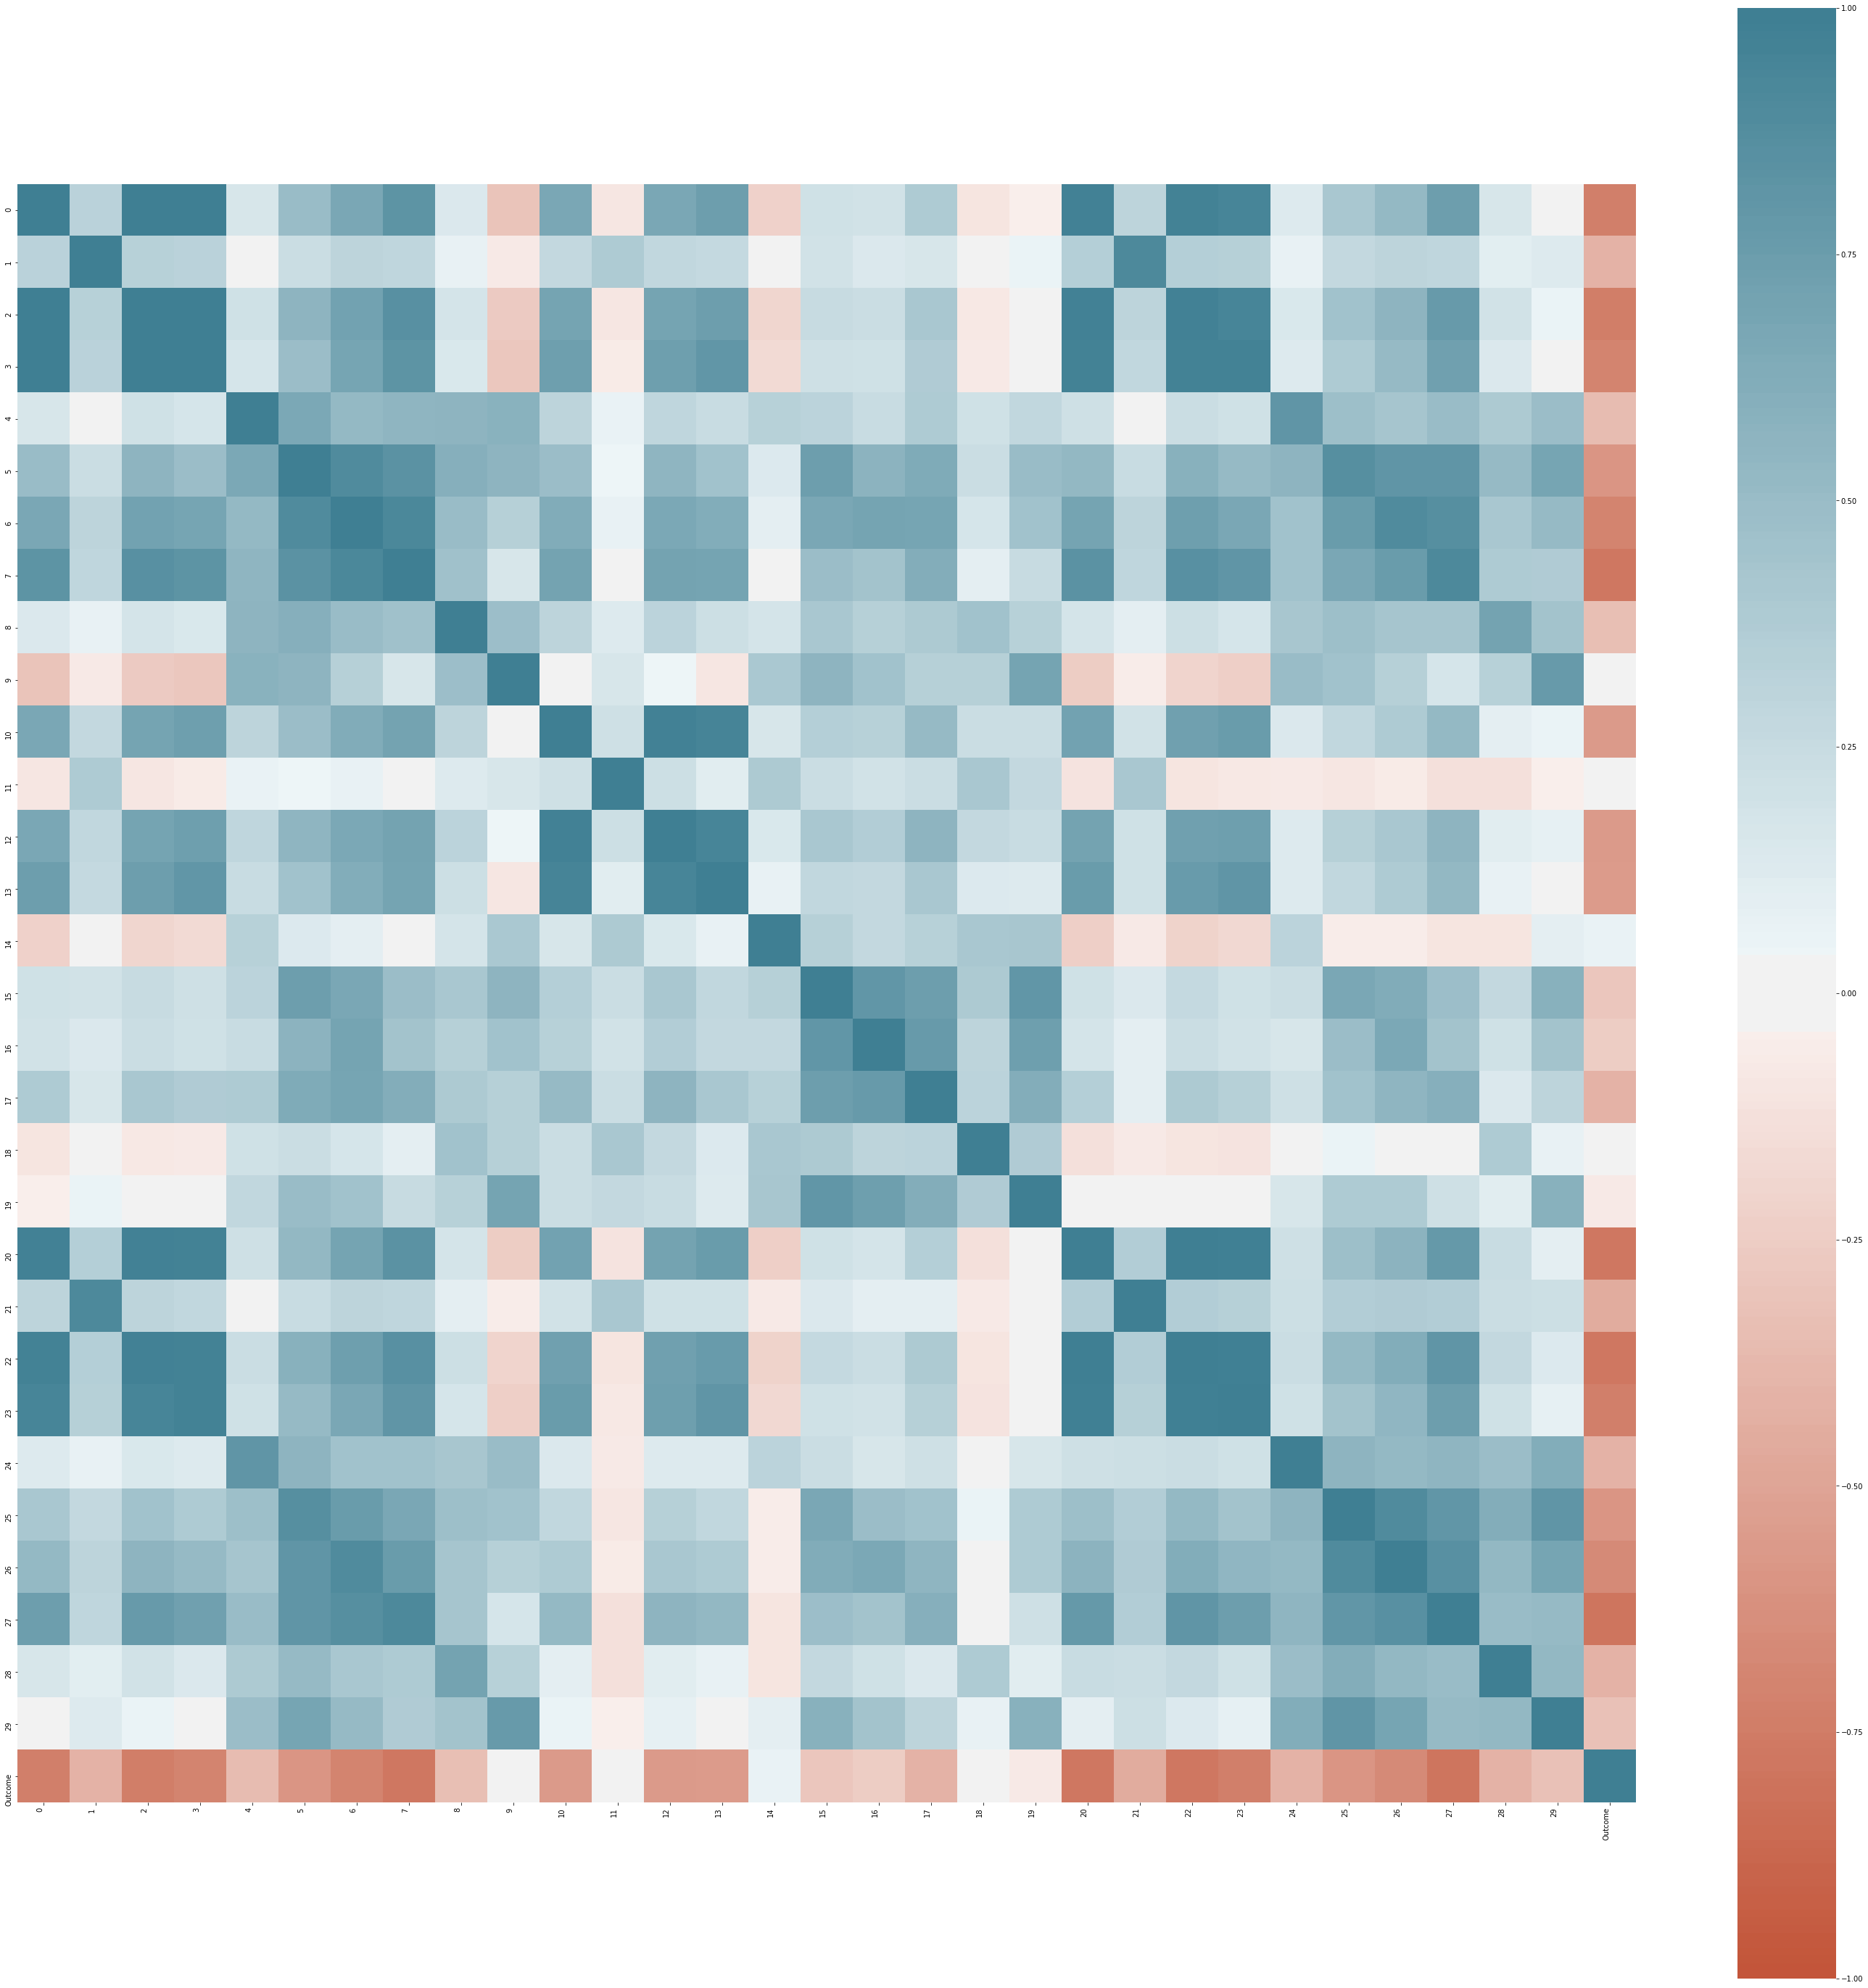

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [50,50])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

From the figure we can see that nearly all variables are  highly correlated with Outcome .So not removing any of them

In [ ]:
FilterData=Fulldata.iloc[:,0:30]
FilterData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
FilterData.shape

(569, 30)

Now variable selection is done ; Now we will do Standardisation of X Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

Label Encoding on Y Values not needed as already in 0 & 1 Encoded Format

In [ ]:
Y1.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [ ]:
Y=Y1

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [ ]:
X_train

array([[ 0.93517589,  1.45915288,  0.92805503, ..., -0.07165977,
        -2.09948403, -0.87367565],
       [-0.71210645, -0.25822266, -0.64211541, ...,  0.41102337,
        -0.38948992,  0.48512019],
       [-0.70074588, -0.51652711, -0.75250514, ..., -1.09610524,
        -0.2746275 , -0.86979654],
       ...,
       [-0.2349626 ,  0.5306531 , -0.27717023, ..., -0.89024164,
        -0.42669888, -0.96234096],
       [ 0.0831333 , -0.63986166,  0.08983445, ...,  0.40797805,
         0.24629786,  0.20471616],
       [ 1.5514867 ,  1.32883712,  1.47176567, ...,  0.48715636,
        -0.98321541, -1.27654864]])

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [ ]:
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-breast-cancer-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.5)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(75,activation="tanh",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(1,activation='sigmoid', kernel_initializer=initializer, bias_initializer=initializer))

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 75)                2325      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 76        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, y_train, epochs=50,batch_size=50, verbose=1, validation_split=0.25,callbacks=callbacks_list)

Epoch 1/50
1/7 [===>..........................] - ETA: 0s - loss: 0.8052 - accuracy: 0.4000
Epoch 00001: val_accuracy improved from -inf to 0.61404, saving model to weights-improvement-breast-cancer-01-0.61.hdf5
7/7 [==============================] - 0s 21ms/step - loss: 0.6767 - accuracy: 0.5103 - val_loss: 0.6179 - val_accuracy: 0.6140
Epoch 2/50
1/7 [===>..........................] - ETA: 0s - loss: 0.5355 - accuracy: 0.6800
Epoch 00002: val_accuracy improved from 0.61404 to 0.79825, saving model to weights-improvement-breast-cancer-02-0.80.hdf5
7/7 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.7683 - val_loss: 0.4502 - val_accuracy: 0.7982
Epoch 3/50
1/7 [===>..........................] - ETA: 0s - loss: 0.4166 - accuracy: 0.8400
Epoch 00003: val_accuracy improved from 0.79825 to 0.86842, saving model to weights-improvement-breast-cancer-03-0.87.hdf5
7/7 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8651 - val_loss: 0.3541

In [ ]:
models_new=models.Sequential()
models_new.add(layers.Dense(75,activation="tanh",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(1,activation='sigmoid', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-breast-cancer-10-0.98.hdf5")
#This depends on storage and jo saved hua hai...so sometimes u need to rename it and chose max accuracy wala only
models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 

#Can use the below model also
#from keras.models import load_model
#saved_model = load_model('weights-improvement-covtype-10-0.81.hdf5')
#test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.8f' % ( test_acc))
#print('Test Loss: %.3f' % ( test_loss))

OSError: ignored

**Accuracy coming around ~ 94% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

Plot of accuracy of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**

1)Made 1st Layer of Tanh Activation and the input dimension = 30 as 30 variables in dataset.

2)Added 2nd Layer of Sigmoid that is also the output layer and 1 classes so choose 1 as next layer shape.

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='binary_crossentropy' as it has 1 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=50 & Batch_size=50 & Steps_per_epoch=7

#**datasets.load_wine()**

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

wine = load_wine()
x_wine = wine.data
y_wine = wine.target
X = pd.DataFrame(x_wine)
Y = pd.DataFrame(y_wine)
print(X.shape)
print(Y.shape)

In [ ]:
Y.columns=["Outcome"]

In [ ]:
Y.head()

In [ ]:
Y['Outcome'].nunique()

In [ ]:
X.isnull().sum()

Hence No Null Values in the Dataset

In [ ]:
Y1=pd.DataFrame(Y.copy())

In [ ]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

From the figure we can see that nearly all the variables are highly correlated with Outcome  

In [ ]:
FilterData=Fulldata.iloc[:,0:13]
FilterData.head()

In [ ]:
FilterData.shape

Now variable selection is done ; Now we will do Standardisation of X Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

Label Enncoding Y Values 

In [ ]:
Y1.head()

In [ ]:
Y = pd.get_dummies(Y1['Outcome'])
Y

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [ ]:
X_train

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train

In [ ]:
X_stand.shape

In [ ]:
Y1['Outcome'].nunique()

In [ ]:
initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-wine-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.75)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(50,activation="sigmoid",input_shape=(13,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(3,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

In [ ]:
model1.summary()

In [ ]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, y_train, epochs=100,verbose=1, validation_split=0.25,callbacks=callbacks_list)

In [ ]:
models_new=models.Sequential()
models_new.add(layers.Dense(50,activation="sigmoid",input_shape=(13,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(3,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-wine-34-0.97.hdf5")
#This depends on storage and jo saved hua hai...so sometimes u need to rename it and chose max accuracy wala only
models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 

#Can use the below model also
#from keras.models import load_model
#saved_model = load_model('weights-improvement-covtype-10-0.81.hdf5')
#test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.8f' % ( test_acc))
#print('Test Loss: %.3f' % ( test_loss))

**Accuracy coming around ~ 91% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

Plot of accuracy of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**

1)Made 1st Layer of Sigmoid Activation and the input dimension = 50 as 50 variables in dataset.

2)Added 2nd Layer of Softmax that is also the output layer and 3 classes so choose 3 as next layer shape.

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 3 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=100 & Steps_per_epoch=4



---

